# The three coupled oscillator model

In [7]:
clear
clc
% close all

In [8]:
% define Paths: replace XXX by your own path
origDir = '/XXX/model/';
addpath(genpath(origDir)); cd(origDir)

% load data (homemade concatenated)
load('inputdata.mat') % data to fit (exp. 2 & 5)
load('outputmodel.mat') % output of the model: scripts to run the modelling can be requested to the corresponding author


% data: reorganize (audio/visual *passive/tracking)
data = cat(1, dataApass, dataAtrack, dataVpass, dataVtrack);
    clear dataApass dataAtrack dataVpass dataVtrack
tim = cat(1, tApass, tAtrack, tVpass, tVtrack);
    clear tApass tAtrack tVpass tVtrack 
omega_tap = 1.7;
omega_int = [1.5, 1.5, 0.7, 0.7]; % natural frequencies of each "clock"


     correlation passive|model: r2= 0.9249,  p= 0.0001 
     correlation tracking|model: r2= 0.9134,  p= 0.0002 
     correlation passive|model: r2= 0.9466,  p= 0.0000 
     correlation tracking|model: r2= 0.9329,  p= 0.0001 


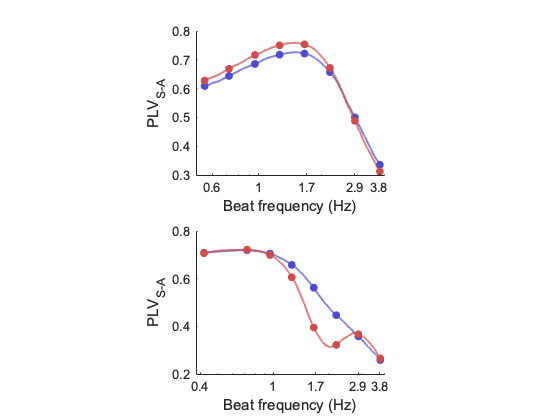

In [10]:
% plot model output for 4 datasets:
xnam = {'Aud pass', 'Aud track', 'Vis pass', 'Vis track'};
figure; set(gcf,'color','w'); colormap([.5 .5 .5; 1 1 1])
for d0 = [1 3] % auditory & visual experiments
   subplot(2,2, d0+.5); hold on  
 % passive
        h = plot(tim(d0,1):0.01:tim(d0,end), [plv{d0,:}], 'color', [.3 .3 .8], 'Linewidth', 1.5);
        h.Color(4) = 0.7;
            [~,b,~] = intersect(round(tim(d0,1):0.01:tim(d0,end),2),round(tim(d0,:),2));
            q = [plv{d0,:}];
            plot(tim(d0,:), q(b),'b.', 'color', [.3 .3 .8], 'MarkerSize',15, 'Linewidth', 1.5)
[r, p] = corr(q(b)', data(d0,:)');
    fprintf('     correlation passive|model: r2= %6.4f,  p= %6.4f \n', r*r, p)  
    
% tracking
h = plot(tim(d0,1):0.01:tim(d0,end), [plv{d0+1,:}], 'color', [.8 .3 .3], 'Linewidth', 1.5);  
h.Color(4) = 0.7;
    [~,b,~] = intersect(round(tim(d0,1):0.01:tim(d0,end),2),round(tim(d0,:),2));
    q = [plv{d0+1,:}];
    plot(tim(d0+1,:), q(b),'r.', 'color', [.8 .3 .3], 'MarkerSize',15, 'Linewidth', 1.5)
[r, p] = corr(q(b)', data(d0+1,:)');
    fprintf('     correlation tracking|model: r2= %6.4f,  p= %6.4f \n', r*r, p)  
    
hold off
    set(gca, 'FontSize', 10, 'FontName', 'Arial') 
    xlabel( 'Beat frequency (Hz)' )
    ylabel( 'PLV_{S-A}' )

    set(gca,'Layer','top','Box','off','TickLength',[.01 .01])
        set(gca, 'XScale', 'log')
    if d0 == 1
        xlim( [.5, 4] )
        xticks( [.6 1 1.7 2.9 3.8] )
    elseif d0 == 3
        xlim( [.38, 4] )
        xticks( [.4 1 1.7 2.9 3.8] )
    end     
end
clear r p h d0 q

% Print figure
cd(origDir)
% print('figure5b&c','-dpng','-r600')
f.PaperSize = [46.81 33.1];
f.PaperPosition(1:2) = [0 0];
print -dpdf figure5b&c.pdf